In [ ]:
import time
import datetime
Current_time = datetime.datetime.now()
import winsound as sd
def beepsound():
    fr = 2000    # range : 37 ~ 32767
    du = 1000     # 1000 ms ==1second
    sd.Beep(fr, du) # winsound.Beep(frequency, duration)
beepsound()
Current_time = datetime.datetime.now()
print(Current_time)

Time0 = datetime.datetime.now()

2023-02-26 20:12:48.015766


In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
np.set_printoptions(precision=3, suppress=True)
plt.rc('font', family='Malgun Gothic')
import seaborn as sns
import scipy as sp
import scipy.stats as stats

import re
import urllib.request
from openpyxl import load_workbook
import os

import statsmodels.api as sm
from statsmodels.formula.api import ols
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from konlpy.tag import Okt

In [ ]:
dataframe = pd.read_excel('C:/Users/Leofold/_Python/_Python_LSTM/tagging seting 5.xlsx')

In [ ]:
print(dataframe.columns)
dataframe.head(2)

Index(['Index', 'Order', 'ID', 'Date', 'Comment', 'CommentLikes',
       'Comment_morphs_A', 'Comment_morphs_N', 'CommentLikes.1', 'Video type',
       'Economy_Job', 'Economy_House', 'Neoliberal_Instrumentalism',
       'Neoliberal_Competition', 'Economy_Classification', 'Nation_Policy',
       'Nation_SocialEnviron', 'Job', 'Housing', 'Instrumentalism',
       'Competition', 'Classification', 'Policy', 'SocialEnvironment'],
      dtype='object')


,Index,Order,ID,Date,Comment,CommentLikes,Comment_morphs_A,Comment_morphs_N,CommentLikes.1,Video type,...,Economy_Classification,Nation_Policy,Nation_SocialEnviron,Job,Housing,Instrumentalism,Competition,Classification,Policy,SocialEnvironment
0,0,926,HomeSweetHome,5개월 전,닭들이 알낳으면 양계장 주인만 존나 좋아하지않냐? 그게 딱 한국 현실이여,17000,"['닭', '들', '이', '알', '낳다', '양', '계장', '주인', '만...","['닭', '알', '계장', '주인', '존나', '그게', '한국', '현실']",17000,SBS_11063,...,1,0,1,0,0,17000,0,17000,0,17000
1,1,10311,오승진,8개월전,나는 평생 집은 커녕 화장실도 못살꺼같으니 많이 해드신 LH직원분들이랑 국회위원분들...,16000,"['나', '는', '평생', '집은', '커녕', '화장실', '도', '못', ...","['나', '평생', '커녕', '화장실', '해', '직원', '국회', '위원'...",16000,YTN_7306%13855,...,1,0,1,0,16000,16000,0,16000,0,16000


In [ ]:
df = dataframe
print(df.info())
print('총 샘플의 수 :',len(df))
print('중복없는 ID 수 :' ,df['ID'].nunique())

print('총 샘플의 수 :',len(df))
print('중복없는 Comment 수 :' ,df['Comment'].nunique())
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89601 entries, 0 to 89600
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Index                       89601 non-null  int64 
 1   Order                       89601 non-null  int64 
 2   ID                          89601 non-null  object
 3   Date                        89601 non-null  object
 4   Comment                     89601 non-null  object
 5   CommentLikes                89601 non-null  int64 
 6   Comment_morphs_A            89601 non-null  object
 7   Comment_morphs_N            89601 non-null  object
 8   CommentLikes.1              89601 non-null  int64 
 9   Video type                  89601 non-null  object
 10  Economy_Job                 89601 non-null  int64 
 11  Economy_House               89601 non-null  int64 
 12  Neoliberal_Instrumentalism  89601 non-null  int64 
 13  Neoliberal_Competition      89601 non-null  in

,Index,Order,ID,Date,Comment,CommentLikes,Comment_morphs_A,Comment_morphs_N,CommentLikes.1,Video type,...,Economy_Classification,Nation_Policy,Nation_SocialEnviron,Job,Housing,Instrumentalism,Competition,Classification,Policy,SocialEnvironment
89596,89596,2328,이재오,1년 전,댓글들 애 안 낳는걸로 시위하나ㅋㅋㅋㅋ꼬라지 봐라,0,"['댓글', '들', '애', '안', '낳다', '는걸', '로', '시위', '...","['댓글', '애', '안', '는걸', '시위', '하나', '꼬']",0,SBS_3196,...,0,0,1,1,1,1,1,1,1,1
89597,89597,3066,YuwonSong,@昇神風,뭔가 오해하는 사람이 많아보이는데... 해당 뉴스 클립에선 돈이 전부가 아니니까 불...,0,"['뭔가', '오해', '하다', '사람', '이', '많다', '보이다', '.....","['뭔가', '오해', '사람', '해당', '뉴스', '클립', '돈', '전부'...",0,SBS_3196,...,1,1,1,1,1,1,1,1,1,1
89598,89598,2555,Merak,1년 전,나만 근본원인을 알지.ㅋㅋ 공무원들은 몰라. 자기들 연금때문에 모른척하나?,0,"['나', '만', '근', '본', '원인', '을', '알', '지', '.',...","['나', '원인', '알', '공무원', '자기', '연금', '때문', '척']",0,SBS_3196,...,0,0,1,1,1,1,1,1,1,1
89599,89599,2554,드래곤로드,1년 전,@집가고싶다 집 값 너무 비싸서 못사서요ㅠㅠ.. 그래서 결혼 안함..ㅋㅋㅋ......,0,"['집', '값', '너무', '비싸다', '못', '사다', 'ㅠㅠ', '..',...","['집', '값', '결혼', '안함', '혼자', '살', '원룸', '살', '...",0,SBS_3196,...,0,0,0,1,1,1,1,1,1,1
89600,89600,58267,kimmmju,1년전(수정됨),진짜 대한민국이 겁나피해의식에 쩔어있구나 나도 애둘있고 연봉 4000만원 조금넘게 ...,0,"['진짜', '대한민국', '이', '겁나', '피해', '의식', '에', '쩔어...","['진짜', '대한민국', '피해', '의식', '애', '연봉', '조금', '좀...",0,YTN_904%1060,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
print('총 샘플의 수 :',len(df))
df.describe()

총 샘플의 수 : 89601


,Index,Order,CommentLikes,CommentLikes.1,Economy_Job,Economy_House,Neoliberal_Instrumentalism,Neoliberal_Competition,Economy_Classification,Nation_Policy,Nation_SocialEnviron,Job,Housing,Instrumentalism,Competition,Classification,Policy,SocialEnvironment
count,89601.000000,89601.000000,89601.000000,89601.000000,89601.000000,89601.000000,89601.000000,89601.000000,89601.000000,89601.000000,89601.000000,89601.000000,89601.000000,89601.000000,89601.000000,89601.000000,89601.000000,89601.000000
mean,44800.000000,17957.278691,21.102309,21.102309,0.183703,0.117633,0.174920,0.167610,0.238736,0.204127,0.492863,4.875660,4.079977,6.900302,4.864767,7.497439,6.034341,14.496791
std,25865.725072,18261.861175,203.255741,203.255741,0.387244,0.322174,0.379901,0.373521,0.426314,0.403065,0.499952,95.909176,105.724238,130.154751,103.617009,135.743912,117.302095,184.215988
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22400.000000,2415.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,44800.000000,9209.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,67200.000000,32814.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,89600.000000,58267.000000,17000.000000,17000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15000.000000,16000.000000,17000.000000,15000.000000,17000.000000,15000.000000,17000.000000


In [ ]:
df.isnull().sum()

Index                         0
Order                         0
ID                            0
Date                          0
Comment                       0
CommentLikes                  0
Comment_morphs_A              0
Comment_morphs_N              0
CommentLikes.1                0
Video type                    0
Economy_Job                   0
Economy_House                 0
Neoliberal_Instrumentalism    0
Neoliberal_Competition        0
Economy_Classification        0
Nation_Policy                 0
Nation_SocialEnviron          0
Job                           0
Housing                       0
Instrumentalism               0
Competition                   0
Classification                0
Policy                        0
SocialEnvironment             0
dtype: int64

In [ ]:
df2 = df[['Order','Comment','Economy_Job', 'Economy_House', 'Neoliberal_Instrumentalism',
       'Neoliberal_Competition', 'Economy_Classification', 'Nation_Policy',
       'Nation_SocialEnviron']]
df2.drop_duplicates(subset=['Comment'], inplace=True)
df2.corr()

C:\Users\Leofold\AppData\Local\Temp\ipykernel_11232\942866700.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(subset=['Comment'], inplace=True)


,Order,Economy_Job,Economy_House,Neoliberal_Instrumentalism,Neoliberal_Competition,Economy_Classification,Nation_Policy,Nation_SocialEnviron
Order,1.000000,0.012874,0.004524,0.003803,0.013641,0.004794,0.028459,0.031714
Economy_Job,0.012874,1.000000,0.255543,0.218659,0.213561,0.335127,0.252783,0.087348
Economy_House,0.004524,0.255543,1.000000,0.113358,0.140717,0.160079,0.156146,0.055389
Neoliberal_Instrumentalism,0.003803,0.218659,0.113358,1.000000,0.257124,0.327404,0.245075,0.186856
Neoliberal_Competition,0.013641,0.213561,0.140717,0.257124,1.000000,0.245606,0.200017,0.099601
Economy_Classification,0.004794,0.335127,0.160079,0.327404,0.245606,1.000000,0.237178,0.189493
Nation_Policy,0.028459,0.252783,0.156146,0.245075,0.200017,0.237178,1.000000,0.169948
Nation_SocialEnviron,0.031714,0.087348,0.055389,0.186856,0.099601,0.189493,0.169948,1.000000


In [ ]:
#

In [ ]:
print('총 샘플의 수 :',len(df2))
print(df['Economy_Job'].value_counts())
print(df['Economy_House'].value_counts())

print('=====================================================')
print('=====================================================')
print('=====================================================')

print(df['Neoliberal_Instrumentalism'].value_counts())
print(df['Neoliberal_Competition'].value_counts())
print(df['Economy_Classification'].value_counts())

print('=====================================================')
print('=====================================================')
print('=====================================================')

print(df['Nation_Policy'].value_counts())
print(df['Nation_SocialEnviron'].value_counts())

총 샘플의 수 : 87514
0    73141
1    16460
Name: Economy_Job, dtype: int64
0    79061
1    10540
Name: Economy_House, dtype: int64
0    73928
1    15673
Name: Neoliberal_Instrumentalism, dtype: int64
0    74583
1    15018
Name: Neoliberal_Competition, dtype: int64
0    68210
1    21391
Name: Economy_Classification, dtype: int64
0    71311
1    18290
Name: Nation_Policy, dtype: int64
0    45440
1    44161
Name: Nation_SocialEnviron, dtype: int64


In [ ]:
####################################
# 컬럼 선택

In [ ]:
df2 = df2[['Order', 'Comment','Nation_SocialEnviron']]
print(df2['Nation_SocialEnviron'].value_counts())

f022 = df2
f022.columns = ['id', 'document', 'label']
f022['label'].value_counts()
data = f022
print(len(data), ': All document count')

0    44223
1    43291
Name: Nation_SocialEnviron, dtype: int64
87514 : All document count


In [ ]:
from tqdm import tqdm

def print_plot(data, label):
    n_total = len(data)
    n_zero = len(data.query(label + ' == 0'))
    n_one = len(data.query(label + ' == 1'))
    print("label 0 : {}개, {:.2f}%".format(n_zero, n_zero*100/n_total))
    print("label 1 : {}개, {:.2f}%\n".format(n_one, n_one*100/n_total))

    values = data[label].value_counts()
    values.plot(kind='bar')
    print(values)

label 0 : 44223개, 50.53%
label 1 : 43291개, 49.47%

0    44223
1    43291
Name: label, dtype: int64


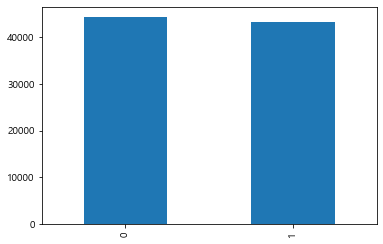

In [ ]:
print_plot(data, 'label')

In [ ]:
data

,id,document,label
0,926,닭들이 알낳으면 양계장 주인만 존나 좋아하지않냐? 그게 딱 한국 현실이여,1
1,10311,나는 평생 집은 커녕 화장실도 못살꺼같으니 많이 해드신 LH직원분들이랑 국회위원분들...,1
2,3010,육아휴직이나 받아주던가 경력단절이나 없던가 월급이나 많던가 교육비나 적던가 내집마련...,1
3,52917,나라가 망하는게 문제가 아니라내가 죽게 생겼다,1
4,487,현재: 제발 애좀 낳으세요 물론 양육비는 처음부터 끝까지 느그가 알아서 하셈 ^^,1
...,...,...,...
89596,2328,댓글들 애 안 낳는걸로 시위하나ㅋㅋㅋㅋ꼬라지 봐라,1
89597,3066,뭔가 오해하는 사람이 많아보이는데... 해당 뉴스 클립에선 돈이 전부가 아니니까 불...,1
89598,2555,나만 근본원인을 알지.ㅋㅋ 공무원들은 몰라. 자기들 연금때문에 모른척하나?,1
89599,2554,@집가고싶다 집 값 너무 비싸서 못사서요ㅠㅠ.. 그래서 결혼 안함..ㅋㅋㅋ......,0


In [ ]:
#

In [ ]:
data.drop_duplicates(subset = ['document'], inplace=True)
data['document'] = data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
data['document'].replace('', np.nan, inplace=True)
data = data.dropna(how='any')
print('전처리 후 테스트용 샘플의 개수 :',len(data))

전처리 후 테스트용 샘플의 개수 : 87494


C:\Users\Leofold\AppData\Local\Temp\ipykernel_11232\4014723852.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['document'] = data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행


In [ ]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
okt = Okt()
okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem = True)

['오다', '이렇다', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔']

In [ ]:
#

In [ ]:
#

In [ ]:
#

In [ ]:
print(data['label'].value_counts())

0    44213
1    43281
Name: label, dtype: int64


In [ ]:
train, test = train_test_split(data, random_state=42,test_size=0.3)

print(len(train), 'train examples')
print(len(test), 'test examples')

61245 train examples
26249 test examples


In [ ]:
print(train['label'].value_counts())
print(test['label'].value_counts())

0    30904
1    30341
Name: label, dtype: int64
0    13309
1    12940
Name: label, dtype: int64


In [ ]:
train_data = train

X_train = []
for sentence in train_data['document']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True)
    temp_X = [word for word in temp_X if not word in stopwords]
    X_train.append(temp_X)
    

test_data = test

X_test = []
for sentence in test_data['document']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True)
    temp_X = [word for word in temp_X if not word in stopwords]
    X_test.append(temp_X)

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
print(tokenizer.word_index)

threshold = 3
total_cnt = len(tokenizer.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0


for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

print(X_train[:3])

{'을': 1, '낳다': 2, '있다': 3, '되다': 4, '없다': 5, '애': 6, '아니다': 7, '안': 8, '보다': 9, '사람': 10, '만': 11, '다': 12, '에서': 13, '로': 14, '못': 15, '적': 16, '나라': 17, '생각': 18, '돈': 19, '말': 20, '그': 21, 'ㅋㅋ': 22, '같다': 23, '그렇다': 24, '결혼': 25, '고': 26, '이다': 27, '않다': 28, '하고': 29, '나': 30, '많다': 31, '더': 32, '내': 33, '것': 34, '살다': 35, '인': 36, '지금': 37, '좋다': 38, '문제': 39, '아이': 40, '여자': 41, 'ㅋㅋㅋ': 42, '가다': 43, '출산': 44, '한국': 45, '게': 46, '인구': 47, '들다': 48, '남자': 49, '왜': 50, '수': 51, '인데': 52, '니': 53, '년': 54, '거': 55, '면': 56, '임': 57, '때': 58, '출산율': 59, '받다': 60, '그냥': 61, '뭐': 62, '지': 63, '요': 64, '일': 65, '명': 66, '아': 67, '키우다': 68, '알다': 69, '저': 70, '살': 71, '이나': 72, '진짜': 73, '집': 74, '까지': 75, '싶다': 76, '모르다': 77, '사회': 78, '국가': 79, '맞다': 80, '하': 81, '그리고': 82, '많이': 83, '힘들다': 84, '만들다': 85, '한테': 86, '해주다': 87, '정부': 88, '우리': 89, '먹다': 90, '서': 91, '여성': 92, '주다': 93, '집값': 94, '너무': 95, 'ㅋㅋㅋㅋ': 96, '안되다': 97, '나오다': 98, '때문': 99, '저출산': 100, '너': 101, '자다': 102, '부터': 10

[[20, 12, 32, 135, 39, 18, 161], [26, 51, 82, 823], [38, 229, 109, 2478, 898, 2478, 90, 806, 2, 963, 120, 19, 12923, 625, 6935, 92, 173, 88, 1174, 27, 7, 3, 69, 4731, 115, 22, 41, 1, 27, 1230, 2905, 3423, 267, 1902, 2759, 12924, 4517, 3881, 917, 9402, 534, 358, 704, 33, 6936, 33, 694, 704, 29, 1526, 896, 6, 2944, 200, 9, 7299, 1, 606, 10, 1820, 25, 41, 864, 181, 740, 1, 550, 138, 20, 984, 433, 25, 12925, 168, 1, 168, 141, 358, 26, 139, 45, 139, 567, 27, 179, 215]]


In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
train_data

,id,document,label
16747,771,돈만 많으면 살기좋은 나라 대한민국,1
80824,110,결혼왜하누,0
35429,2057,지금 이 상황에 이런 시국 저런 시국 우리의 경험을 빚대어 생각했을때돈으로 처발라...,1
81851,56889,대학교들은 정원미달이 아니라 비리로 사라졌음,1
86334,5838,갑자기 지혼자 빚쟁이얘기하면서 급발진 ㅋㅋㅋㅋㅋㅋㅋㅋㅋ 하물며 삼성 애플도 맨날...,0
...,...,...,...
6293,2060,이나라에 일년에 만이나 태어나는게 더 소름이네 이런 불행한 땅에 애를 낳는게 죄지 ...,1
55995,3409,너도 군대가지말구 출산해,0
78586,3044,억지ㅡㅡ학비땜에 그렇지 학원이랑 과외 몇백만원드는데 하나 잘 키우려고 하지ㅡㅡ주택이...,0
866,31410,아이를 낳으면 나를 희생해야하는 순간이 와서 그걸 감당할 자신이 없음 아이는 사랑으...,1


61234
61234
댓글의 최대 길이 : 1160
댓글의 평균 길이 : 23.070042786687136


C:\Users\Leofold\anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


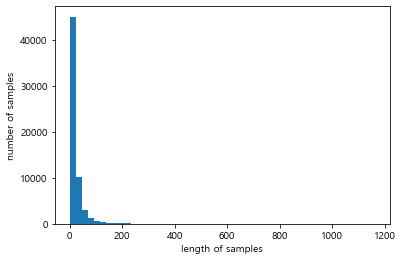

전체 샘플 중 길이가 30 이하인 샘플의 비율: 80.29199464349871


In [ ]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

print('Maximum Length of comments :',max(len(l) for l in X_train))
print('Average Length of comments :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()


def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('Below threshold %s Length: %s'%(max_len, (cnt / len(nested_list))*100))

max_len = 30
below_threshold_len(max_len, X_train)

X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)


from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
#

In [ ]:
#

In [ ]:
from keras import backend as K
def recall(y_target, y_pred):

    y_target_yn = K.round(K.clip(y_target, 0, 1))
    y_pred_yn = K.round(K.clip(y_pred, 0, 1))

    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    count_true_positive_false_negative = K.sum(y_target_yn)

    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    return recall


def precision(y_target, y_pred):

    y_pred_yn = K.round(K.clip(y_pred, 0, 1))
    y_target_yn = K.round(K.clip(y_target, 0, 1))

    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    count_true_positive_false_positive = K.sum(y_pred_yn)

    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    return precision


def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)

    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())

    return _f1score


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', precision, recall, f1score]) 

In [ ]:
X_train

array([[   0,    0,    0, ...,   39,   18,  161],
       [   0,    0,    0, ...,   51,   82,  823],
       [   1,  606,   10, ...,   27,  179,  215],
       ...,
       [   0, 3275,  922, ...,   69, 3275, 7084],
       [ 122,  375,  977, ...,  197,   19,  144],
       [   0,    0,    0, ...,    1,   30,    4]])

In [ ]:
y_train

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [ ]:
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
817/817 [==============================] - 27s 31ms/step - loss: 0.4034 - accuracy: 0.7994 - precision: 0.8331 - recall: 0.7518 - f1score: 0.7845 - val_loss: 0.3376 - val_accuracy: 0.8356 - val_precision: 0.8268 - val_recall: 0.8450 - val_f1score: 0.8330
Epoch 2/15
817/817 [==============================] - 25s 31ms/step - loss: 0.2758 - accuracy: 0.8740 - precision: 0.8870 - recall: 0.8566 - f1score: 0.8690 - val_loss: 0.3231 - val_accuracy: 0.8520 - val_precision: 0.8807 - val_recall: 0.8104 - val_f1score: 0.8416
Epoch 3/15
817/817 [==============================] - 24s 29ms/step - loss: 0.2048 - accuracy: 0.9140 - precision: 0.9233 - recall: 0.9016 - f1score: 0.9107 - val_loss: 0.3243 - val_accuracy: 0.8432 - val_precision: 0.8512 - val_recall: 0.8279 - val_f1score: 0.8366
Epoch 4/15
817/817 [==============================] - 23s 29ms/step - loss: 0.1483 - accuracy: 0.9407 - precision: 0.9494 - recall: 0.9306 - f1score: 0.9388 - val_loss: 0.4103 - val_accuracy: 0.8483 - v

In [ ]:
_loss, _acc, _precision, _recall, _f1score = model.evaluate(X_test, y_test, batch_size=60)
print('loss: {:.3f}, accuracy: {:.3f}, precision: {:.3f}, recall: {:.3f}, f1score: {:.3f}'.format(_loss, _acc, _precision, _recall, _f1score))

438/438 [==============================] - 3s 7ms/step - loss: 0.5528 - accuracy: 0.8501 - precision: 0.8417 - recall: 0.8565 - f1score: 0.8468
loss: 0.553, accuracy: 0.850, precision: 0.842, recall: 0.856, f1score: 0.847
